**DEBUG CODE**


In [38]:
from importlib import reload

In [39]:
#this also takes care of all the imports
import analysis_helper
import analysis_graphs
from analysis_helper import *
from analysis_graphs import *
reload(analysis_helper)
reload(analysis_graphs)

<module 'analysis_graphs' from '/Users/felixbinder/Cloud/Grad School/Fan Lab/Block Construction/tools_block_construction/analysis/utils/analysis_graphs.py'>

In [43]:
%load_ext snakeviz

**DEBUG CODE END**

# Block construction agents

This is the main analysis file for the [block construction task](https://github.com/cogtoolslab/block_construction). 

The data should be loaded in by a dataframe produced by experiment_runner.py

In [5]:
# set up imports
import os
import sys
__file__ = os.getcwd()
proj_dir =  os.path.dirname(os.path.realpath(__file__))
sys.path.append(proj_dir)
utils_dir = os.path.join(proj_dir,'utils')
sys.path.append(utils_dir)
analysis_dir = os.path.join(proj_dir,'analysis')
analysis_utils_dir = os.path.join(analysis_dir,'utils')
sys.path.append(analysis_utils_dir)
agent_dir = os.path.join(proj_dir,'model')
sys.path.append(agent_dir)
agent_util_dir = os.path.join(agent_dir,'utils')
sys.path.append(agent_util_dir)
experiments_dir = os.path.join(proj_dir,'experiments')
sys.path.append(experiments_dir)
df_dir = os.path.join(proj_dir,'results/dataframes')

In [6]:
from analysis.utils.analysis_helper import *
from analysis.utils.analysis_graphs import *
import utils.blockworld as bw

In [7]:
plt.rcParams["figure.figsize"] = (20,7)
plt.rcParams.update({'font.size': 22})

In [8]:
#display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

Let's load the results of the experiment

In [9]:
df_paths = ['exp_runner_test.pkl'] #for testing

In [ ]:
df_paths = ['construction_paper_agent.pkl',
           'breadth_search.pkl'] #for testing

In [ ]:
df_paths = ['construction_paper_agent.pkl',
           'breadth_search_1_and_3.pkl'] #for testing

In [ ]:
df_paths = ['breadth_search.pkl'] #for testing

In [ ]:
df_paths = ['construction_paper_agent_decompositions.pkl',
          'breadth_search_1_and_3.pkl'] #for testing

In [ ]:
df_paths = ['Astar_search.pkl',
           'breadth_search.pkl',
           'beam_search.pkl',
           'MCTS.pkl',
           'Naive_Q_search.pkl']

In [ ]:
df_paths = ['legal_actions_experiment.pkl'] #for testing

In [10]:
#load all experiments as one dataframe
df = pd.concat([pd.read_pickle(os.path.join(df_dir,l)) for l in df_paths])

In [ ]:
#precompute F1 scores for every row
fill_F1(df)

In [ ]:
#precompute which rows in the dataframe are the last row of a run
fill_final_row(df)

In [40]:
#compute decomposition increments
add_increment_sequence(df)

,run_ID,agent,world,step,planning_step,states_evaluated,action,_action,action_x,action_block_width,action_block_height,blocks,_blocks,blockmap,_world,legal_action_space,fast_failure,execution_time,world_status,world_failure_reason,agent_attributes,agent_type,decomposition_function,lower level: agent_type,lower level: scoring_function,lower level: horizon,lower level: scoring_type,lower level: random_seed,decomposed_silhouette,decomposition_increment,decomposition_increment_sequence
0,int_struct_14 | Construction_Paper_Agent lower level agent: BFS_Agent scoring: F1score horizon: 1 scoring: Average sparse?: False random seed: None decomposition functionfixed_11 | 6755,Construction_Paper_Agent,int_struct_14,0,1,NaN,"[(4x2), 3]","((4x2), 3)",3,4,2,"[4x2 at (3,7)]","[4x2 at (3,7)]","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, 1, 0]]",Blockworld,False,False,NaN,NaN,NaN,"{'agent_type': 'Construction_Paper_Agent', 'decomposition_function': 'fixed_1', 'lower level: agent_type': 'BFS_Agent', 'lower level: scoring_function': 'F1score', 'lower level: horizon': 1, 'lower level: scoring_type': 'Average', 'lower level: random_seed': None}",Construction_Paper_Agent,fixed_1,BFS_Agent,F1score,1,Average,None,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
1,int_struct_14 | Construction_Paper_Agent lower level agent: BFS_Agent scoring: F1score horizon: 1 scoring: Average sparse?: False random seed: None decomposition functionfixed_11 | 6755,Construction_Paper_Agent,int_struct_14,1,1,NaN,"[(2x1), 1]","((2x1), 1)",1,2,1,"[4x2 at (3,7), 2x1 at (1,7)]","[4x2 at (3,7), 2x1 at (1,7)]","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 0], [0, 2, 2, 1, 1, 1, 1, 0]]",Blockworld,False,False,NaN,NaN,NaN,"{'agent_type': 'Construction_Paper_Agent', 'decomposition_function': 'fixed_1', 'lower level: agent_type': 'BFS_Agent', 'lower level: scoring_function': 'F1score', 'lower level: horizon': 1, 'lower level: scoring_type': 'Average', 'lower level: random_seed': None}",Construction_Paper_Agent,fixed_1,BFS_Agent,F1score,1,Average,None,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
2,int_struct_14 | Construction_Paper_Agent lower level agent: BFS_Agent scoring: F1score horizon: 1 scoring: Average sparse?: False random seed: None decomposition functionfixed_11 | 6755,Construction_Paper_Agent,int_struct_14,2,1,NaN,"[(1x2), 7]","((1x2), 7)",7,1,2,"[4x2 at (3,7), 2x1 at (1,7), 1x2 at (7,7)]","[4x2 at (3,7), 2x1 at (1,7), 1x2 at (7,7)]","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 3], [0, 2, 2, 1, 1, 1, 1, 3]]",Blockworld,False,False,NaN,NaN,NaN,"{'agent_type': 'Construction_Paper_Agent', 'decomposition_function': 'fixed_1', 'lower level: agent_type': 'BFS_Agent', 'lower level: scoring_function': 'F1score', 'lower level: horizon': 1, 'lower level: scoring_type': 'Average', 'lower level: random_seed': None}",Construction_Paper_Agent,fixed_1,BFS_Agent,F1score,1,Average,None,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
3,int_struct_14 | Construction_Paper_Agent lower level agent: BFS_Agent scoring: F1score horizon: 1 scoring: Average sparse?: False random seed: None decomposition functionfixed_11 | 6755,Construction_Paper_Agent,int_struct_14,3,1,175,"[(1x2), 0]","((1x2), 0)",0,1,2,"[4x2 at (3,7), 2x1 at (1,7), 1x2 at (7,7), 1x2 at (0,7)]","[4x2 at (3,7), 2x1 at (1,7), 1x2 at (7,7), 1x2 at (0,7)]","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 1, 1, 1, 1, 3], [4, 2, 2, 1, 1, 1, 1, 3]]",Blockworld,False,False,0.747926,Ongoing,None,"{'agent_type': 'Construc

In [11]:
display(df)

,run_ID,agent,world,step,planning_step,states_evaluated,action,_action,action_x,action_block_width,action_block_height,blocks,_blocks,blockmap,_world,legal_action_space,fast_failure,execution_time,world_status,world_failure_reason,agent_attributes,agent_type,decomposition_function,lower level: agent_type,lower level: scoring_function,lower level: horizon,lower level: scoring_type,lower level: random_seed,decomposed_silhouette,decomposition_increment
0,int_struct_14 | Construction_Paper_Agent lower level agent: BFS_Agent scoring: F1score horizon: 1 scoring: Average sparse?: False random seed: None decomposition functionfixed_11 | 6755,Construction_Paper_Agent,int_struct_14,0,1,NaN,"[(4x2), 3]","((4x2), 3)",3,4,2,"[4x2 at (3,7)]","[4x2 at (3,7)]","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, 1, 0]]",Blockworld,False,False,NaN,NaN,NaN,"{'agent_type': 'Construction_Paper_Agent', 'decomposition_function': 'fixed_1', 'lower level: agent_type': 'BFS_Agent', 'lower level: scoring_function': 'F1score', 'lower level: horizon': 1, 'lower level: scoring_type': 'Average', 'lower level: random_seed': None}",Construction_Paper_Agent,fixed_1,BFS_Agent,F1score,1,Average,None,NaN,NaN
1,int_struct_14 | Construction_Paper_Agent lower level agent: BFS_Agent scoring: F1score horizon: 1 scoring: Average sparse?: False random seed: None decomposition functionfixed_11 | 6755,Construction_Paper_Agent,int_struct_14,1,1,NaN,"[(2x1), 1]","((2x1), 1)",1,2,1,"[4x2 at (3,7), 2x1 at (1,7)]","[4x2 at (3,7), 2x1 at (1,7)]","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 0], [0, 2, 2, 1, 1, 1, 1, 0]]",Blockworld,False,False,NaN,NaN,NaN,"{'agent_type': 'Construction_Paper_Agent', 'decomposition_function': 'fixed_1', 'lower level: agent_type': 'BFS_Agent', 'lower level: scoring_function': 'F1score', 'lower level: horizon': 1, 'lower level: scoring_type': 'Average', 'lower level: random_seed': None}",Construction_Paper_Agent,fixed_1,BFS_Agent,F1score,1,Average,None,NaN,NaN
2,int_struct_14 | Construction_Paper_Agent lower level agent: BFS_Agent scoring: F1score horizon: 1 scoring: Average sparse?: False random seed: None decomposition functionfixed_11 | 6755,Construction_Paper_Agent,int_struct_14,2,1,NaN,"[(1x2), 7]","((1x2), 7)",7,1,2,"[4x2 at (3,7), 2x1 at (1,7), 1x2 at (7,7)]","[4x2 at (3,7), 2x1 at (1,7), 1x2 at (7,7)]","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 3], [0, 2, 2, 1, 1, 1, 1, 3]]",Blockworld,False,False,NaN,NaN,NaN,"{'agent_type': 'Construction_Paper_Agent', 'decomposition_function': 'fixed_1', 'lower level: agent_type': 'BFS_Agent', 'lower level: scoring_function': 'F1score', 'lower level: horizon': 1, 'lower level: scoring_type': 'Average', 'lower level: random_seed': None}",Construction_Paper_Agent,fixed_1,BFS_Agent,F1score,1,Average,None,NaN,NaN
3,int_struct_14 | Construction_Paper_Agent lower level agent: BFS_Agent scoring: F1score horizon: 1 scoring: Average sparse?: False random seed: None decomposition functionfixed_11 | 6755,Construction_Paper_Agent,int_struct_14,3,1,175,"[(1x2), 0]","((1x2), 0)",0,1,2,"[4x2 at (3,7), 2x1 at (1,7), 1x2 at (7,7), 1x2 at (0,7)]","[4x2 at (3,7), 2x1 at (1,7), 1x2 at (7,7), 1x2 at (0,7)]","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 1, 1, 1, 1, 3], [4, 2, 2, 1, 1, 1, 1, 3]]",Blockworld,False,False,0.747926,Ongoing,None,"{'agent_type': 'Construction_Paper_Agent', 'decomposition_function': 'fixed_1', 'lower level: agent_type': 'BFS_Agent', 'lower level: scoring_function': 'F1

We'll have data for the following agents, agent configurations and on the following silhouettes:

In [13]:
list(df['agent'].unique())

['Construction_Paper_Agent']

In [14]:
list(df['agent_attributes'].unique())

["{'agent_type': 'Construction_Paper_Agent', 'decomposition_function': 'fixed_1', 'lower level: agent_type': 'BFS_Agent', 'lower level: scoring_function': 'F1score', 'lower level: horizon': 1, 'lower level: scoring_type': 'Average', 'lower level: random_seed': None}"]

In [15]:
list(df['world'].unique())

['int_struct_14', 'int_struct_11', 'stonehenge_6_4', 'stonehenge_3_3']

In [16]:
df.columns

Index(['run_ID', 'agent', 'world', 'step', 'planning_step', 'states_evaluated',
       'action', '_action', 'action_x', 'action_block_width',
       'action_block_height', 'blocks', '_blocks', 'blockmap', '_world',
       'legal_action_space', 'fast_failure', 'execution_time', 'world_status',
       'world_failure_reason', 'agent_attributes', 'agent_type',
       'decomposition_function', 'lower level: agent_type',
       'lower level: scoring_function', 'lower level: horizon',
       'lower level: scoring_type', 'lower level: random_seed',
       'decomposed_silhouette', 'decomposition_increment'],
      dtype='object')

A graphical illustration of the silhouettes used in the dataframe:

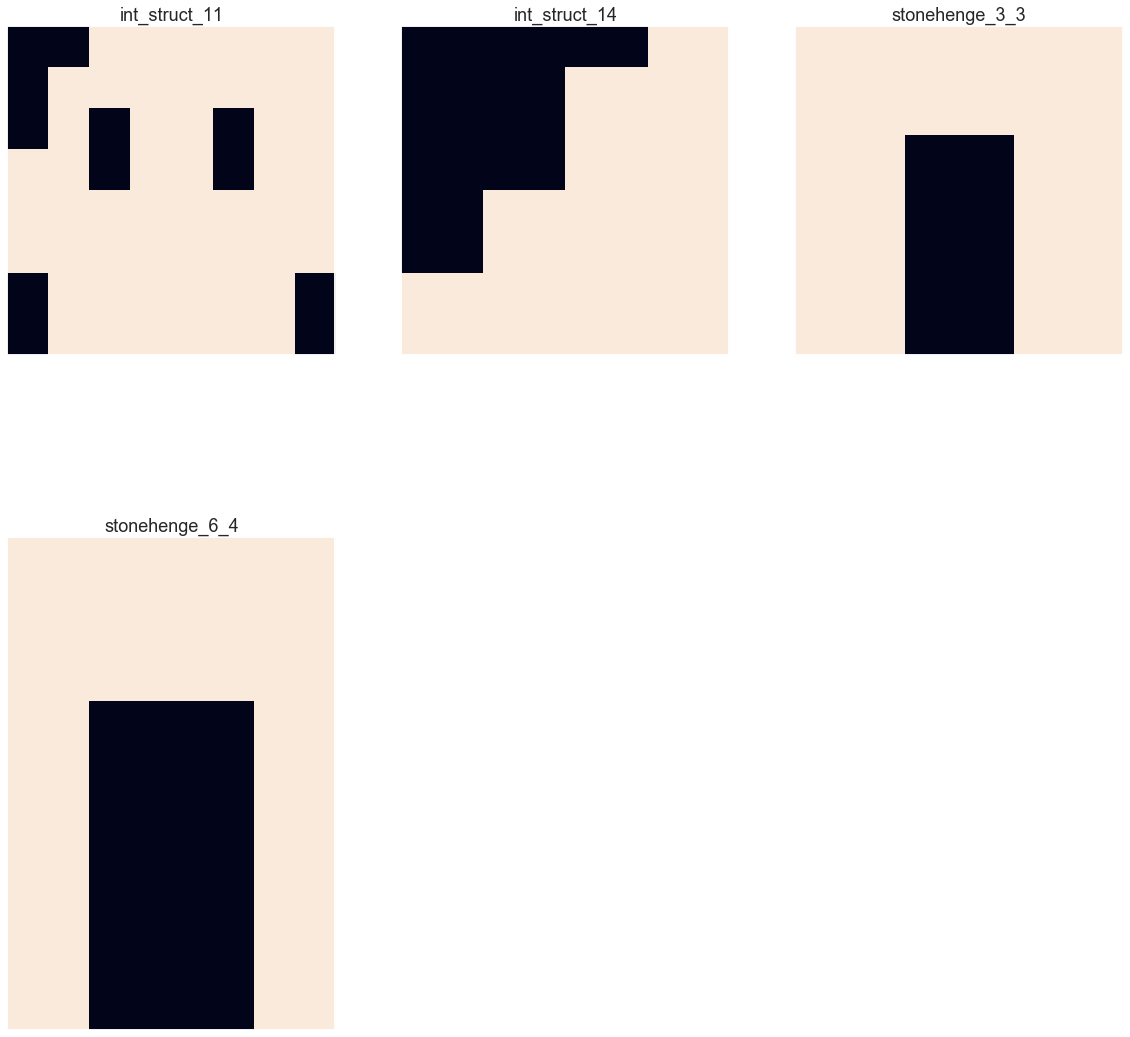

In [17]:
illustrate_worlds(df)

In [43]:
df['decomposition_increment_sequence'].unique()

array(['[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]', '[1.0, 1.0, 1.0, 1.0, 1.0]',
       '[1.0, 1.0, 1.0]', '[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]',
       '[1.0, 1.0, 1.0, 1.0]'], dtype=object)

## Overview over agents
All agents use pure F1 score to judge the value of intermediate states.

| Agent |  | Parameters |
|:--|:--|:--|
| Random (special case of BFS) | Randomly chooses a legal action. | *None* |
| Breadth first search | Agent performs breadth first search on the tree of all possible actions and chooses the sequence of actions that has the highest average reward over the next *planning depth* steps | Horizon: how many steps in advance is the tree of possible actions searched? |
| MCTS | Implements Monte Carlo Tree Search | Horizon: the number of rollouts per run |
| Naive Q learning | Implements naive Q learning with an epsilon-greedy exploration policy | Maximum number of episodes: how many episodes per run |
| A* search | Implements A* search algorithm. Runs until winning state is found or an upper limit of steps is reached. Is determininistic.| *None* |
| Beam search | Implements beam search: searches tree of possible action, but only keeps the best *beam size* actions at each iteration. Is determininistic. | Beam size: the number of states kept under consideration at every step |
| Construction paper agent | Implements the construction paper agent: it occludes part of the silhuouette, uses a lower level agent to build the remainder, then 'slides up' the occluder and builds again... | Lower level agent: the lower level planning agent together with its parameters |

### Glossary

**Run**: training (if applicable) and running one agent on one particular silhouette.

**Silhouette**: the particular outline (and set of baseblocks) that the agent has to reconstruct.

**State**: state of the blockworld environment consisting of the blocks that have already been placed in it.

## Success

### Rate of perfect reconstruction per agent

How often does an agent succeed in getting a perfect reconstruction?

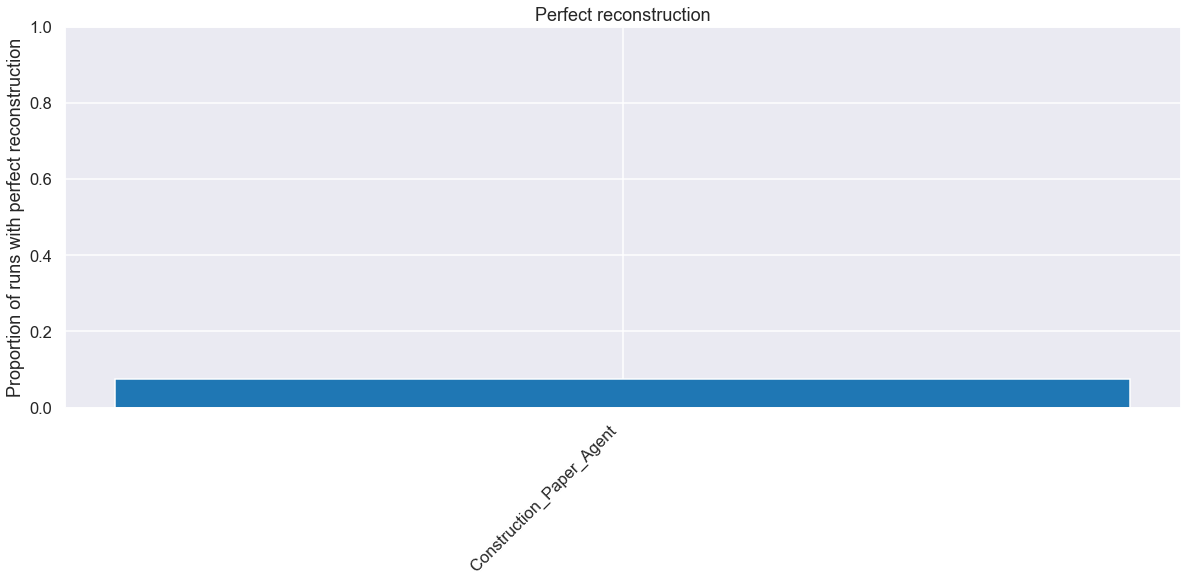

In [18]:
mean_win_per_agent(df)

### Rate of perfect reconstruction per agent over silhouettes
How often does an agent achieve a perfect reconstruction in a particular world?

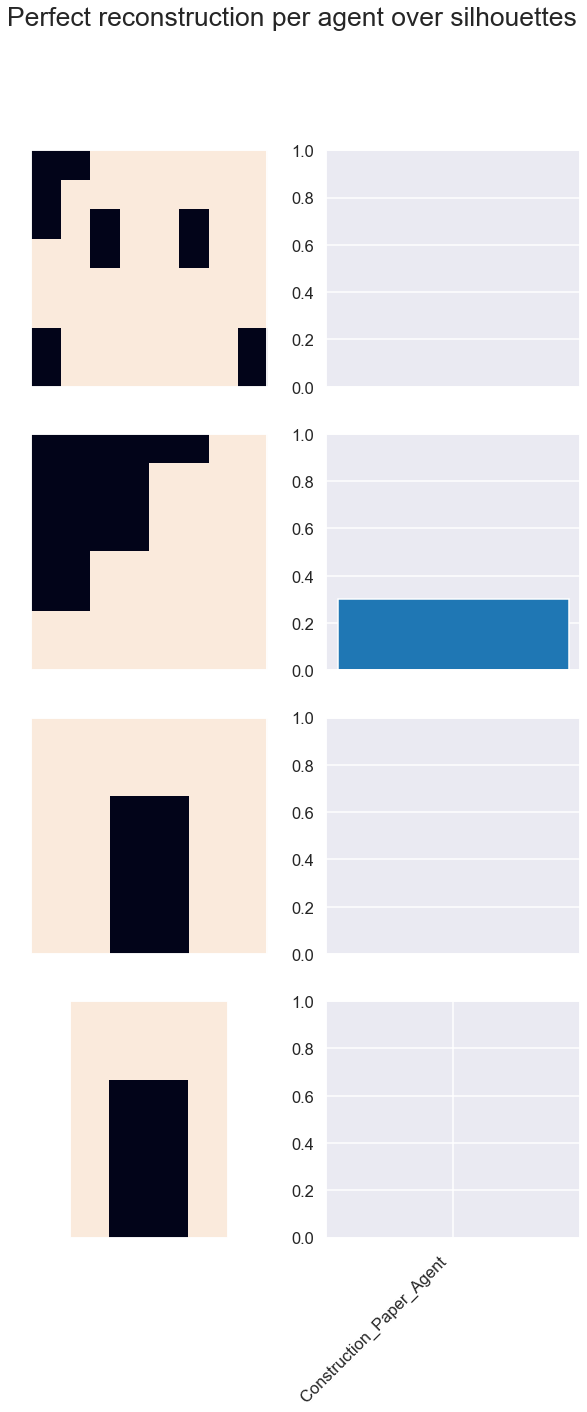

In [19]:
mean_win_per_agent_over_worlds(df)

### F1 score
What [F1 score](https://en.wikipedia.org/wiki/F1_score) does the agent achieve? Since F1 score decreases if an agent keeps building after being unable to perfectly recreate the structure, we look at the peak of F1 score for every run. 

So here is the average peak F1 score per agent conditioned on outcome of the run.

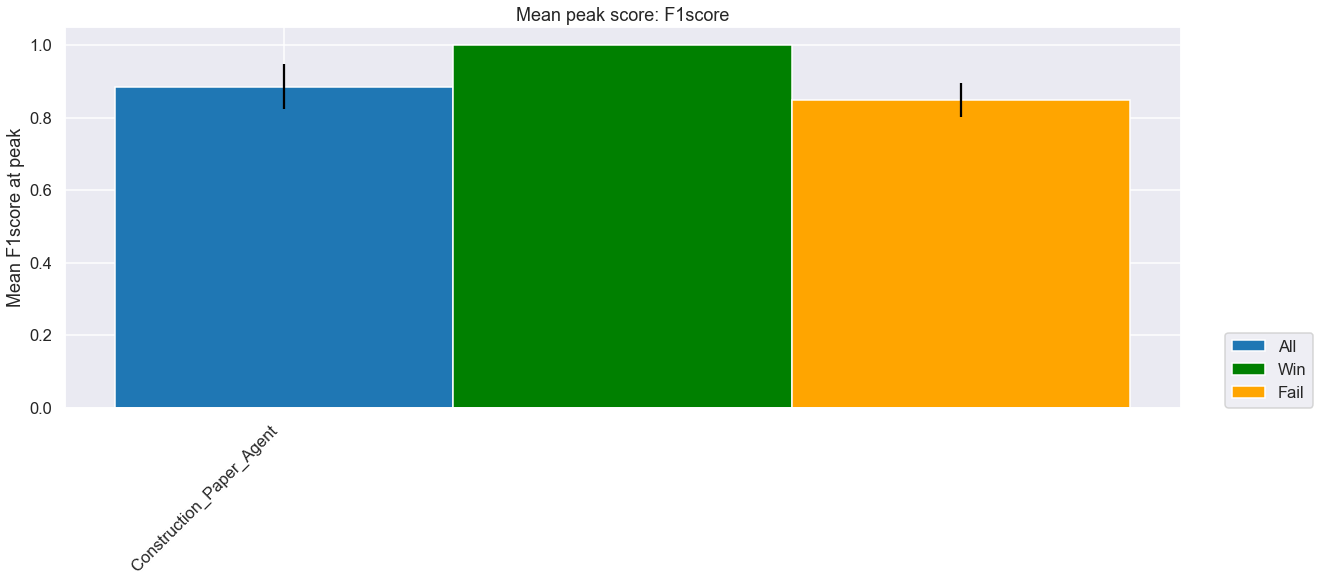

In [20]:
mean_peak_score_per_agent(df)

#### F1 score over silhouettes
What is the peak F1 score for a particular silhouette?

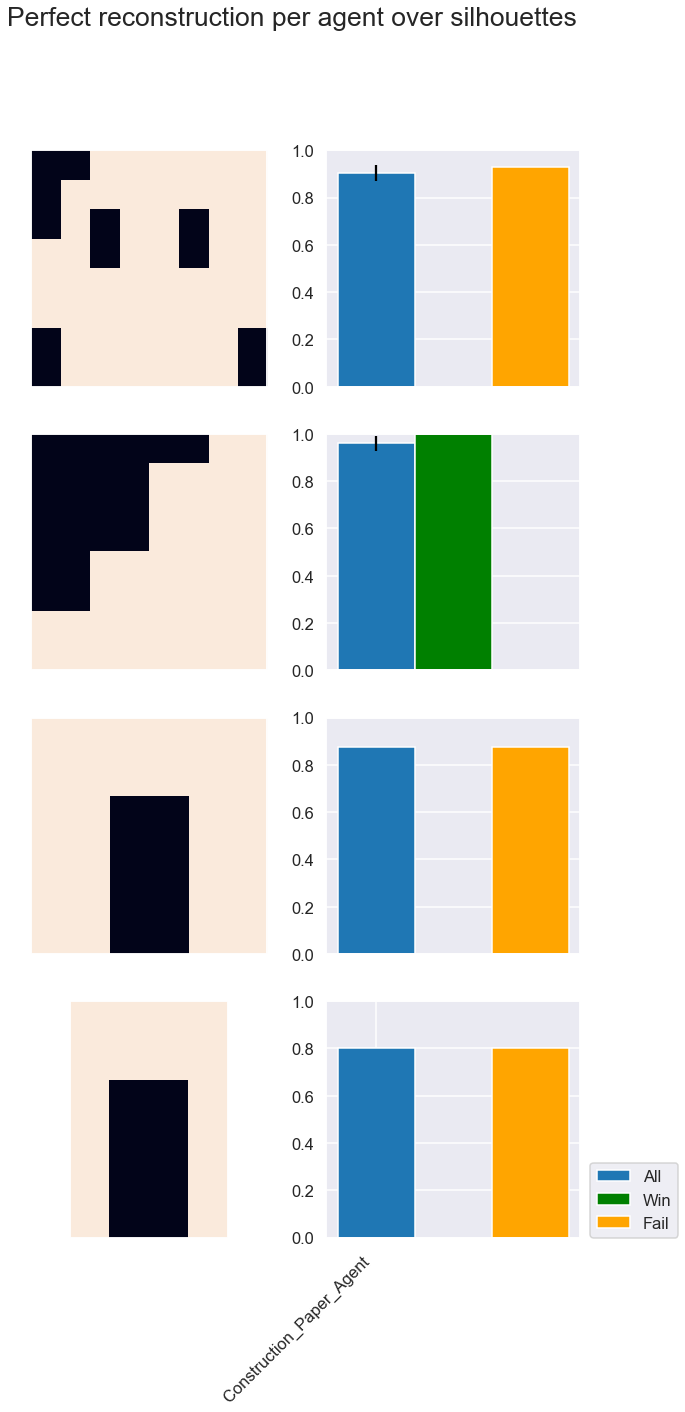

In [21]:
mean_peak_F1_per_agent_over_worlds(df)

## Failure kinds
In run where the agent fails to achieve perfect reconstruction, what is the reason for the failure?

**Full** indicates that no further block can be placed.
**Unstable** indicates the structure has collapsed.
**Did not finish** means that the agent hasn't finished building either because it terminated or it reached the limit on number of steps (40). 

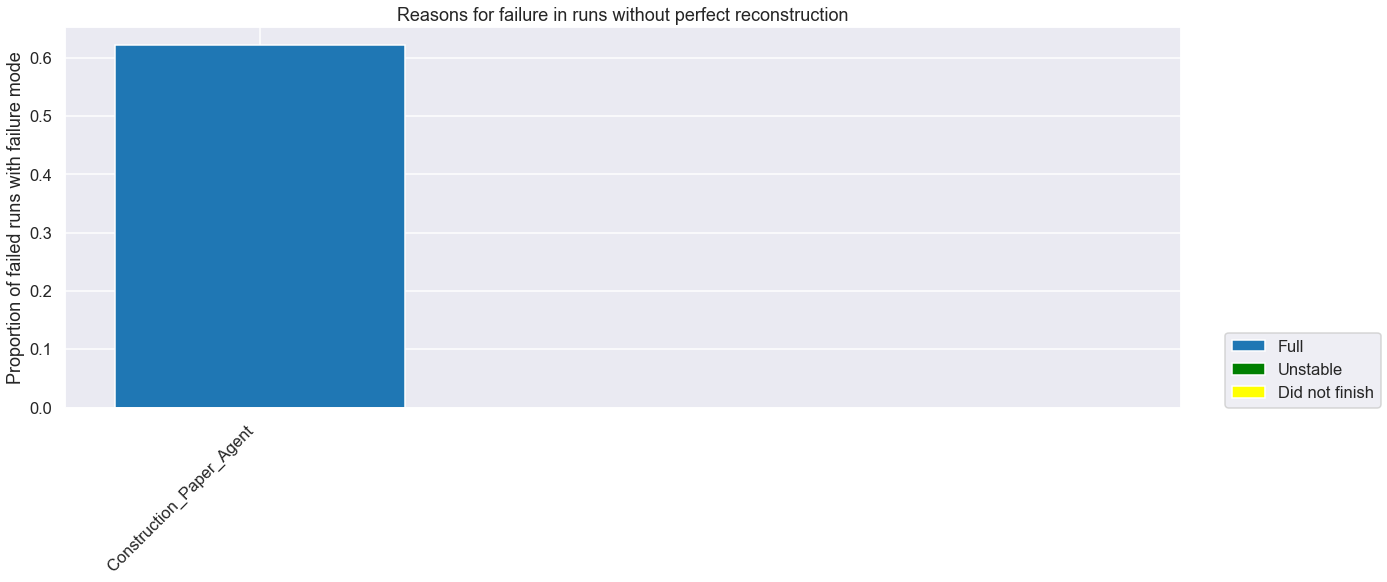

In [22]:
mean_failure_reason_per_agent(df)

### Failure kinds over silhouettes
In kinds of failure does a certain agent on a certain silhouette tend to make?

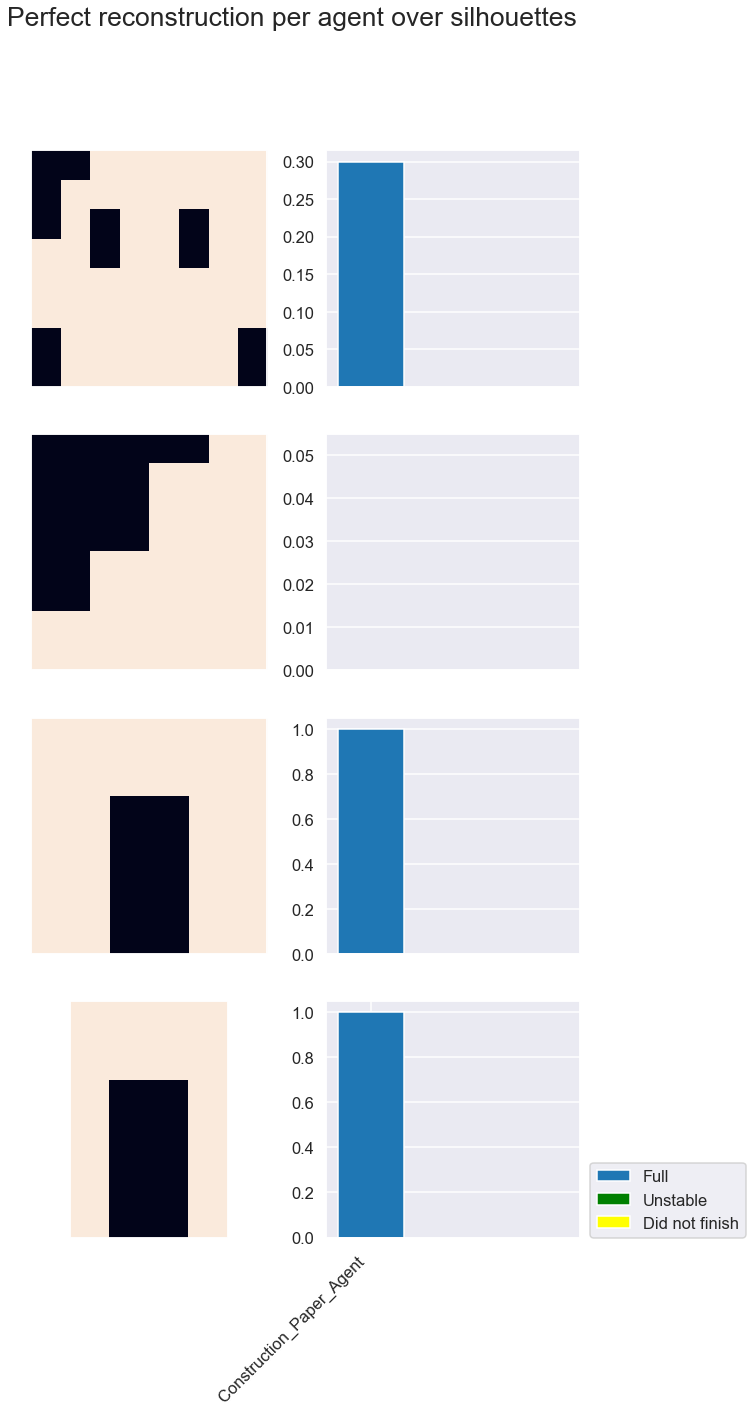

In [23]:
mean_failure_reason_per_agent_over_worlds(df)

### Holes
The most common failure mode is leaving holes in the structure that should be covered with a block, but that the agent can't get to because a block has been above. Here, the measure is defined as the number of grid cells that are in the silhouette, not built on, but the cell right above is built. The higher this number, the more or the larger the holes are that the agent builds.

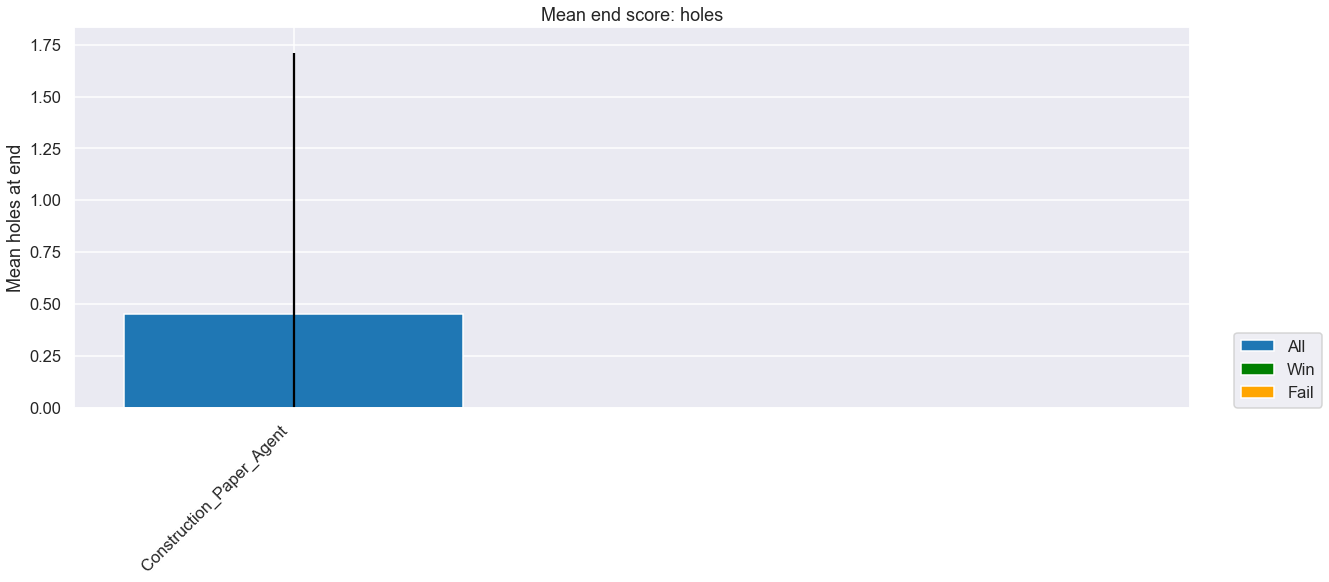

In [24]:
mean_score_per_agent(df,scoring_function=bw.holes)

### Heatmaps
To get a qualitative sense of what the agents are doing, let's look at the heatmap of all runs of an agent on a particular silhouette at the moment of peak F1. Looking at final states will include many runs in which the agent has simply filled the entire area. 
Brighter colors indicate higher average occupancy of a cell. The target is shown on the left.

Note that if the final block placed was unstable it is still included here.

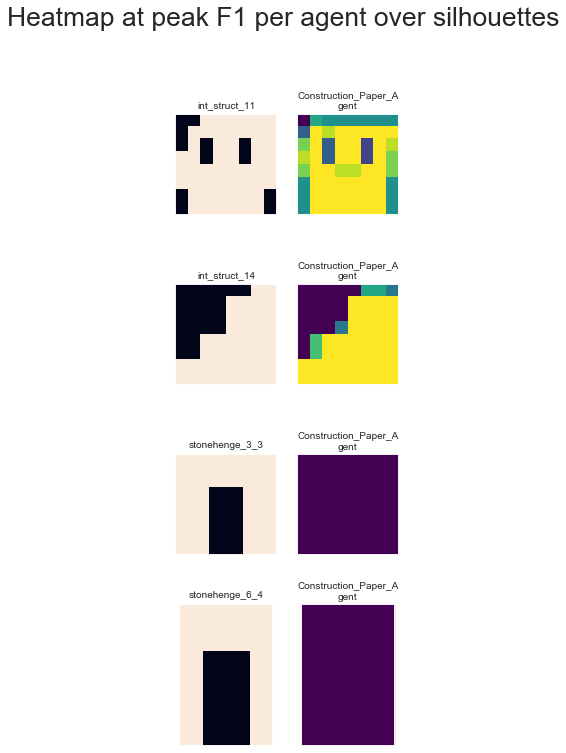

In [25]:
heatmaps_at_peak_per_agent_over_world(df)

## Greediness
Do agents prefer a greedy policy (using large blocks to cover much area) or a conservative policy of using smaller blocks and more steps?

### Number of steps taken
On average, how many steps does an agent take before the end of the run? 

Looking at the average number of steps for runs with perfect reconstruction ("win") tells us whether an agent builds with larger or smaller blocks. 

Looking at the average number of steps for runs with failed reconstructions ("fail") tells whether the failures occur early or late in the process. Since many failures are due to the agent simply filling everything with blocks this number is likely high and not very informative.

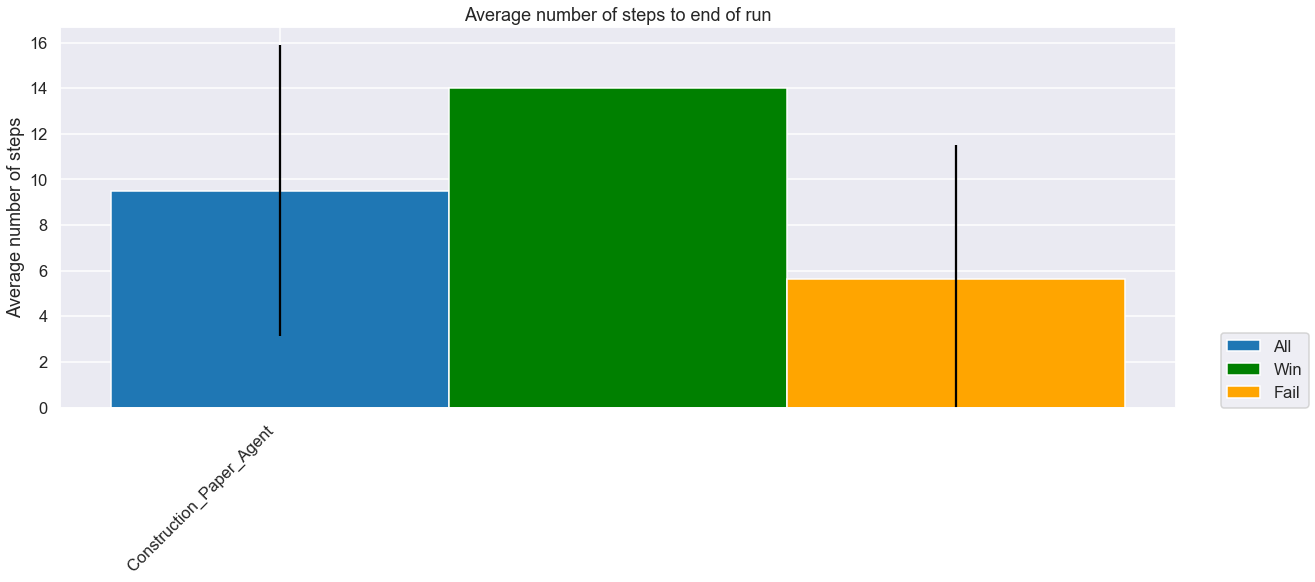

In [26]:
avg_steps_to_end_per_agent(df)

### Growth rate of F1 score
On average, what is the average F1 score taken over every action up to the peak of F1 score for a particular run? For runs conditioned on perfect reconstructions, what is the growth rate of F1?

The higher this number is, the more F1 score is gained early on in the run (ie. a logaritmic looking curve of F1 score). 
Note that the bars conditioned on winning runs all have a peak F1 score of 1 and are thus directly comparable.

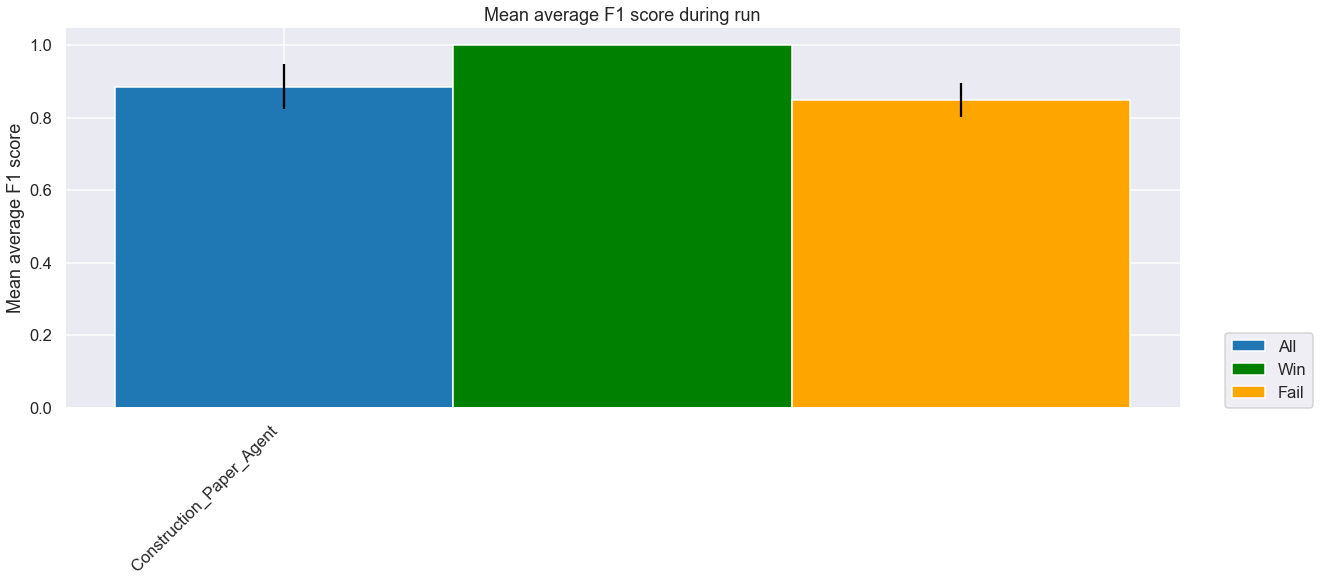

In [27]:
mean_avg_area_under_curve_to_peakF1_per_agent(df)

### Average F1 score over time
What is the average F1 score over time? 

Decreasing line indicates the behavior of the agent to keep choosing the least-worst action if a perfect reconstruction is no longer possible.

For runs that terminate early, the last F1 score is kept as to not show outliers in the later part of the graph. Thus, a perfect reconstruction at step 8 is counted as a score of 1 for the last 12 steps. 

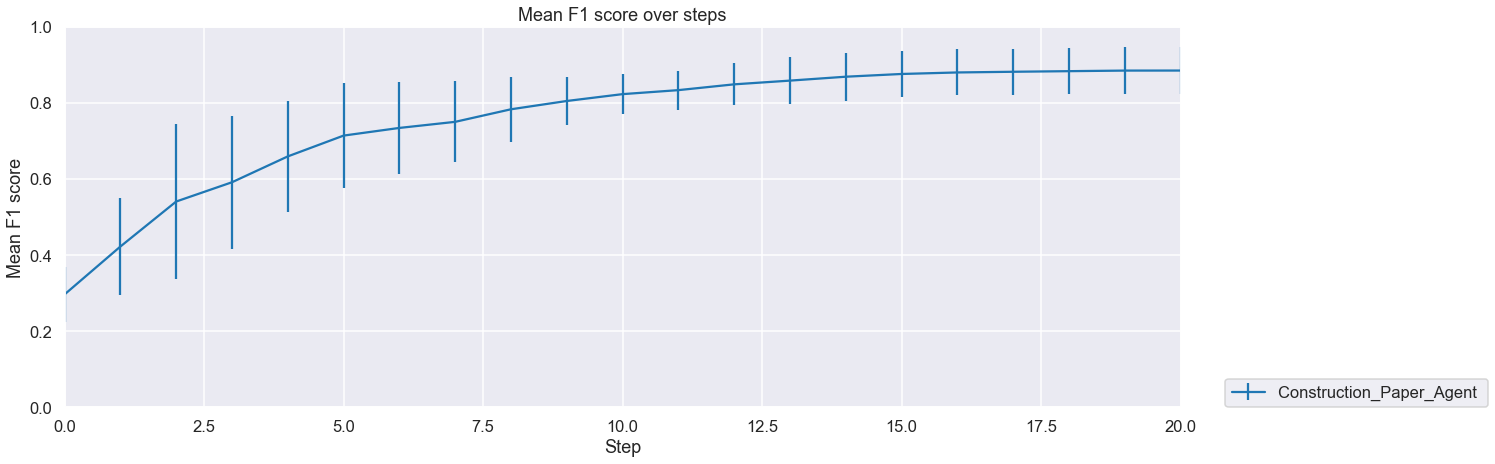

In [28]:
graph_mean_F1_over_time_per_agent(df)

### Average block size over time
What is the average size of the block placed at a certain step?

Note that only runs that aren't finished at a given step are included in the calculation of the mean/std, so later steps might be less informative.

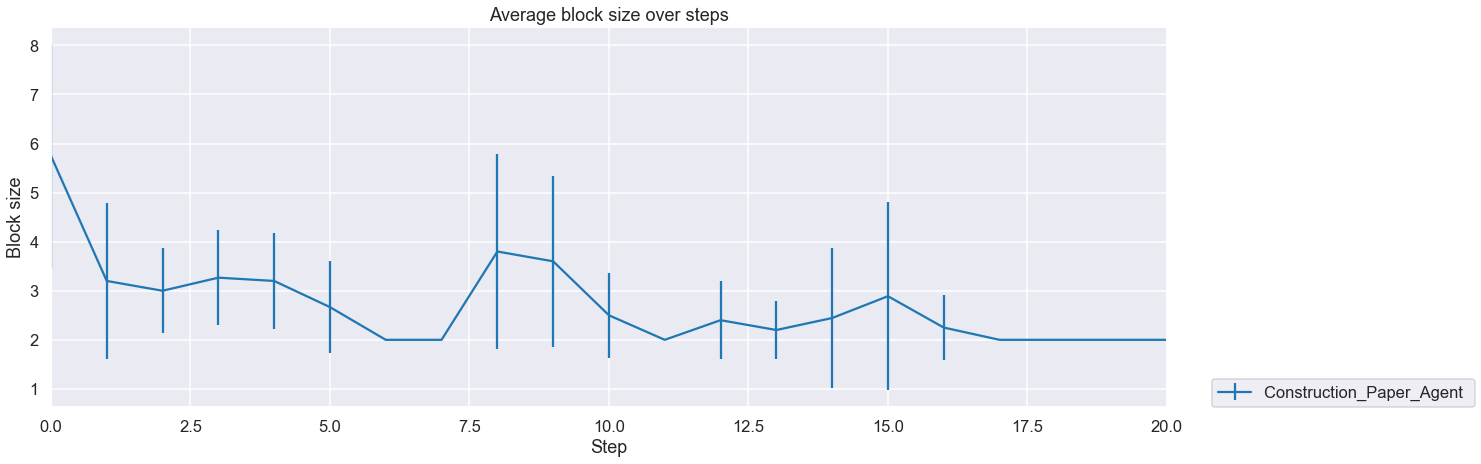

In [29]:
graph_avg_blocksize_over_time_per_agent(df)

## Consistency
### Average pairwise Euclidean distance of block placements
How consistent are different runs of the same agent on the same silhouette?

Here, we measure the average pairwise distance for an agent across runs on the same silhouette. A lower score indicates higher similarity. A score of 0 indicates that all runs were identical—this occurs when the agent is deterministic.

>For any pair of action sequences, we define the “raw action dissimilarity” as the mean Euclidean distance between corresponding pairs of [x, y, w, h] action vectors. When two sequences are of different lengths, we evaluate this metric over the first k actions in both, where k represents the length of the shorter sequence

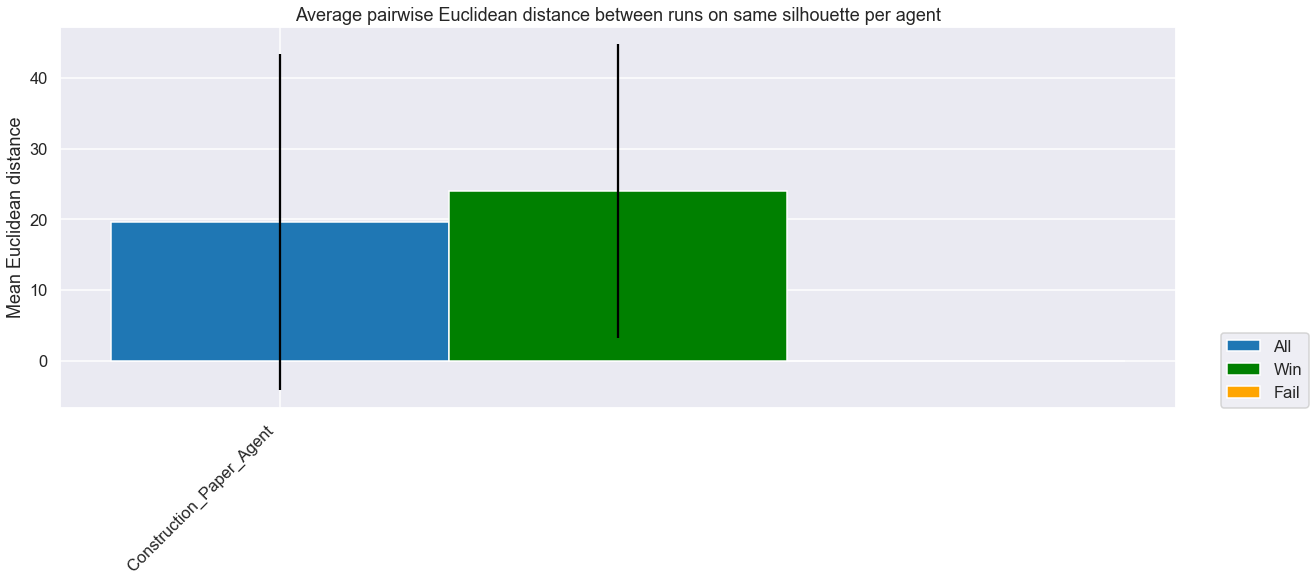

In [30]:
#This scales exponentially and takes a really long time
mean_pairwise_raw_euclidean_distance_between_runs(df)

### Trajectory graph
The trajectory graph (adopted from [block_construction](https://github.com/cogtoolslab/block_construction)) shows the path all runs from a single agent on a particular value take through state space. The y axis orders states by F1 score. The size of nodes indicates how common a certain state is. The color indicates whether the coloured edge ends in failure (red) or at least one perfect reconstruction.

/Users/felixbinder/Cloud/Grad School/Fan Lab/Block Construction/tools_block_construction/analysis/utils/analysis_helper.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F1'] = df.apply(get_F1,axis=1)
/Users/felixbinder/Cloud/Grad School/Fan Lab/Block Construction/tools_block_construction/analysis/utils/scoring.py:30: RuntimeWarning: invalid value encountered in double_scalars
  recall = numerator/denominator
/Users/felixbinder/anaconda3/envs/projection_blocks/lib/python3.8/site-packages/scipy/ndimage/measurements.py:1358: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer
/Users/felixbinder/Cloud/Grad School/Fan Lab/Block Construction/tools_block_const

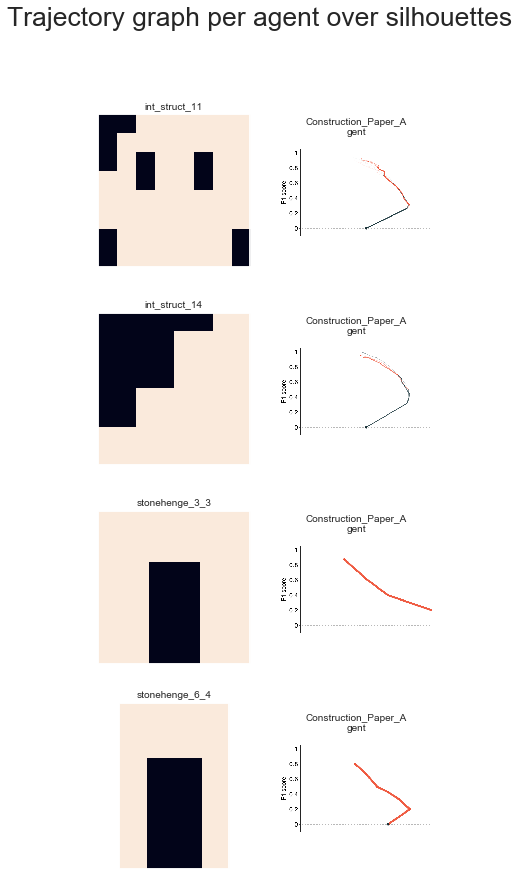

In [31]:
trajectory_per_agent_over_world(df)

## Locality bias
### Proportion of local block placements
Does the agent prefer to place a block on top of or next to the last placed block?

The score is calculated by looking at what percentage of blocks placed during a run touch (either top/bottom or sides, not corners) the block placed immediately before. 
A score of 1 indicates that all blocks were placed on the last one, a score of 0 indicates that the agent switched to a different location to build at every opportunity.

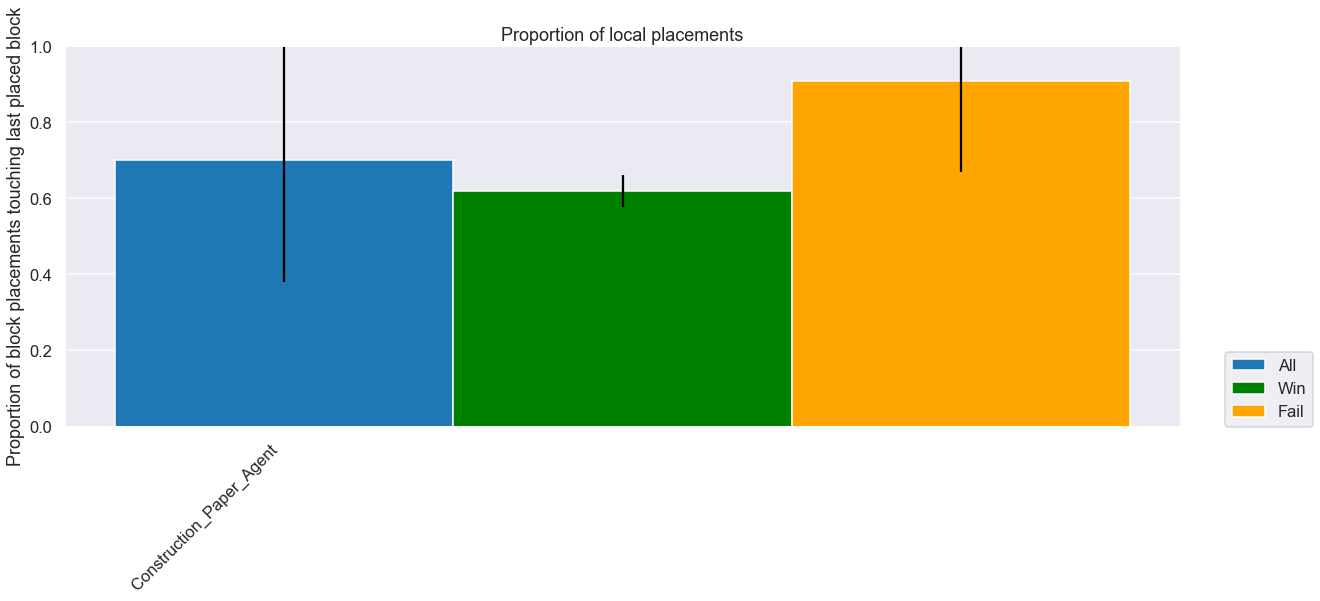

In [32]:
mean_touching_last_block_per_agent(df)

## Planning cost
### How many states are evaluated during planning?
How many states are evaluated during planning? This is a proxy for how expensive and effective the planning of an agent is. 

Low scores for the runs conditioned on perfect reconstructions indicate that often when a solution can be found, it can be found quickly.

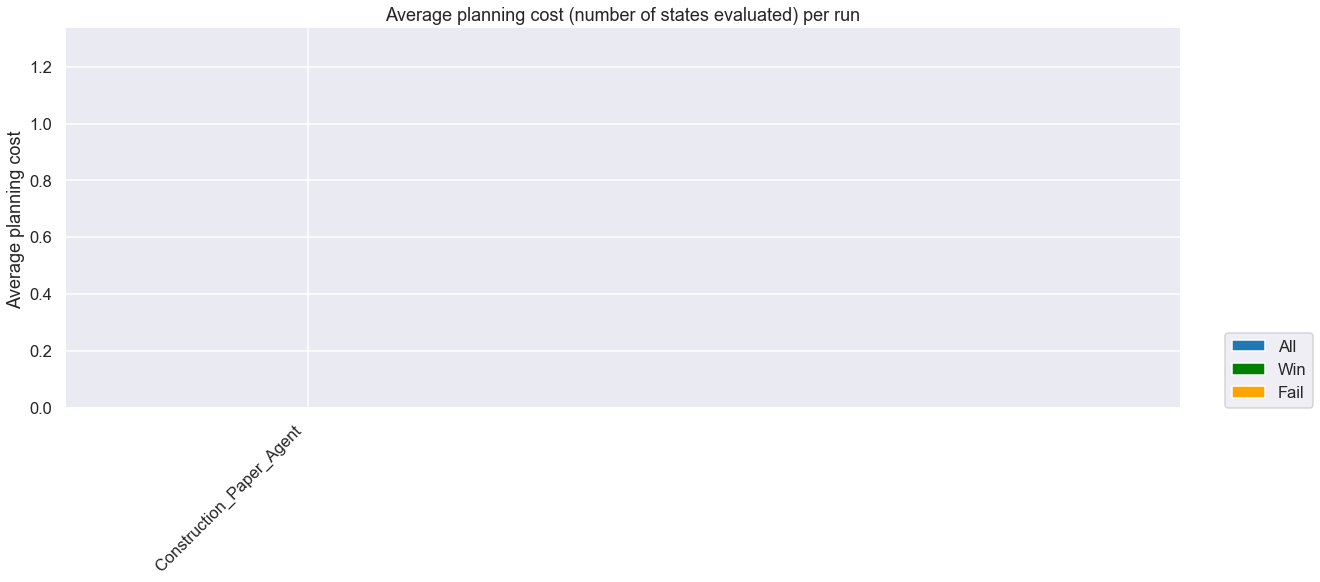

In [35]:
total_avg_states_evaluated_per_agent(df)